# Amazon Sentiment Analysis Project

## Introduction

This project aims to analyze and classify sentiments from Amazon reviews. The data used for this project is sourced from Kaggle and involves text reviews of products from Amazon. The goal is to build a model that can accurately predict the sentiment of these reviews.

## Objectives

1. **Data Exploration and Preprocessing**:
   - Load and explore the dataset to understand its structure and contents.
   - Clean and preprocess the text data to prepare it for modeling.

2. **Model Development**:
   - Implement traditional machine learning models (e.g., Logistic Regression, Random Forest, Decision Tree, Naive Bayes) to classify sentiments.
   - Develop and evaluate various neural network models (e.g., RNN, LSTM, Bi-RNN, Bi-LSTM) for sentiment analysis.

3. **Evaluation**:
   - Compare the performance of different models using accuracy and other metrics.
   - Identify the best-performing model and evaluate its performance with detailed metrics and visualizations.

## Data Description

The dataset consists of Amazon product reviews with the following columns:
- **`label`**: The sentiment label (positive or negative).
- **`title`**: The title of the review.
- **`text`**: The full text of the review.

The data is split into training and testing sets for model development and evaluation.

## Methodology

1. **Loading Data**:
   - Import the dataset from Google Drive.

2. **Exploratory Data Analysis (EDA)**:
   - Perform initial data exploration to check for missing values, duplicates, and class distribution.
   - Visualize the distribution of sentiments in the dataset.

3. **Text Preprocessing**:
   - Clean the text data by removing HTML tags, URLs, special characters, and performing tokenization and lemmatization.

4. **Feature Extraction**:
   - Convert text data into numerical features using TF-IDF vectorization.
   - Prepare text data for neural network models using tokenization and padding.

5. **Model Training**:
   - Train and evaluate traditional machine learning models.
   - Develop and assess neural network models for better performance.

6. **Model Evaluation**:
   - Identify the best model based on accuracy and other performance metrics.
   - Generate and interpret classification reports and confusion matrices.

## Tools and Libraries

- **Python Libraries**: Pandas, NumPy, Seaborn, Matplotlib, Scikit-learn, TensorFlow/Keras, NLTK
- **Development Environment**: Google Colab

---

**Let's begin by loading and exploring the dataset to understand its structure and contents.**

---


## Mounting Google Drive

To access files stored in Google Drive, we need to mount it to our Colab environment. The following code will prompt for authorization and mount Google Drive to the `/content/drive` directory.


In [1]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In this cell, we import a variety of libraries and modules necessary for data analysis, machine learning, and deep learning tasks. These libraries include:

- **Pandas and NumPy** for data manipulation.
- **Seaborn and Matplotlib** for data visualization.
- **Scikit-learn** for traditional machine learning models and metrics.
- **TensorFlow/Keras** for deep learning models.
- **NLTK** for natural language processing.
- **Regular Expressions** for text processing.

This setup provides the tools needed for various data processing, model training, and evaluation tasks.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout, Conv1D, GlobalMaxPooling1D, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim.downloader as api
from gensim.models import KeyedVectors

In [3]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Load the pre-trained Word2Vec model from Gensim
word2vec_model = api.load("word2vec-google-news-300")  # Google News 300 model

[==================================================] 100.0% 1662.8/1662.8MB downloaded


## Loading Datasets

In this cell, we load the training and testing datasets from Google Drive into pandas DataFrames. The datasets are read from the following CSV files:

- `train.csv`: Contains the training data.
- `test.csv`: Contains the test data.

These datasets will be used for data exploration, preprocessing, and model training.


In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

## Exploratory Data Analysis (EDA)

In this cell, we perform several EDA tasks to better understand the datasets and prepare them for modeling:

1. **Dataset Overview**:
   - Display basic information about `df_train` using `df_train.info()`.
   - Rename columns for clarity.
   - Preview the first few rows of `df_train` and `df_test` with `df_train.head()` and `df_test.head()`.

2. **Class Distribution**:
   - Print the value counts of the `label` column to understand class distribution in both training and testing datasets.

3. **Missing Values**:
   - Check for missing values with `df_train.isna().sum()` and `df_test.isna().sum()`.
   - Drop rows with missing values from both datasets.
   - Confirm that missing values have been handled.

4. **Duplicate Records**:
   - Check for and count duplicate records in both datasets.

5. **Dataset Shapes**:
   - Print the shapes of the datasets to understand their sizes.

6. **Class Imbalance Visualization**:
   - Plot a countplot of sentiment labels in the training dataset to visualize class distribution.

7. **Subset of Data**:
   - Reduce the datasets to a manageable size for quicker processing with `df_train.head(10000)` and `df_test.head(1000)`.

8. **Label Mapping**:
   - Map the label values to binary classes (0 and 1) for binary classification.

These steps help in understanding the data, checking for issues, and preparing it for further analysis or model training.


In [6]:
df_train.head()

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                      Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                      ----- 
 0   2                                                                  

In [8]:
df_train.columns = ['label', 'title', 'text']
df_train.head()

,label,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [9]:
df_test.columns = ['label', 'title', 'text']
df_test.head()

,label,title,text
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [10]:
print(df_train['label'].value_counts())
print(df_test['label'].value_counts())

label
1    1800000
2    1799999
Name: count, dtype: int64
label
1    200000
2    199999
Name: count, dtype: int64


In [11]:
print(df_train.isna().sum())
print(df_test.isna().sum())

label      0
title    207
text       0
dtype: int64
label     0
title    24
text      0
dtype: int64


In [12]:
# dropping null values
df_train = df_train.dropna()
df_test = df_test.dropna()

In [13]:
print(df_train.isna().sum())
print(df_test.isna().sum())

label    0
title    0
text     0
dtype: int64
label    0
title    0
text     0
dtype: int64


In [14]:
df_train.duplicated().sum()
df_test.duplicated().sum()

0

In [15]:
print(df_train.shape)
print(df_test.shape)

(3599792, 3)
(399975, 3)


<ipython-input-16-4c4ca7cb6c79>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_train['label'].value_counts(),palette="mako")


Text(0.5, 1.0, 'Countplot for Sentiment Labels')

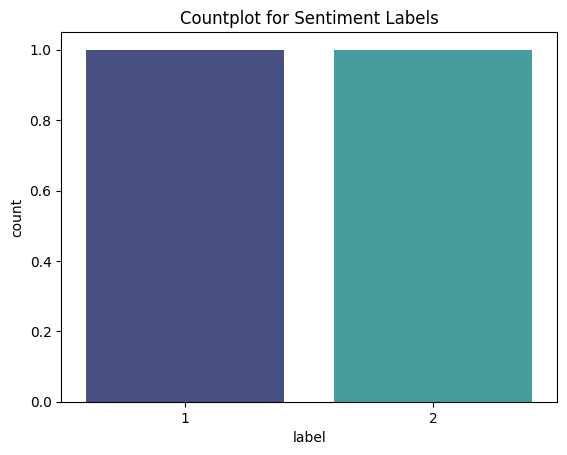

In [16]:
sns.countplot(df_train['label'].value_counts(),palette="mako")
plt.title("Countplot for Sentiment Labels")

In [17]:
df_train = df_train.head(10000)
df_test = df_test.head(1000)

In [18]:
df_train['label'] = df_train['label'].map({1:0, 2:1})
df_test['label'] = df_test['label'].map({1:0, 2:1})

In [19]:
df_train.head()

,label,title,text
0,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,1,Amazing!,This soundtrack is my favorite music of all ti...
2,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,1,an absolute masterpiece,I am quite sure any of you actually taking the...


In [20]:
df_test.head()

,label,title,text
0,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,0,DVD Player crapped out after one year,I also began having the incorrect disc problem...


## Text Preprocessing

In this cell, we perform text preprocessing to clean and prepare the text data for further analysis or model training. The steps include:

1. **Text Cleaning**:
   - **Function**: `clean_text(text)`
   - **Purpose**: Remove HTML tags, URLs, special characters, and extra whitespace. Convert text to lowercase.

2. **Tokenization, Stopword Removal, and Lemmatization**:
   - **Function**: `tokenize_remove_stopwords_and_lemmatize(text)`
   - **Purpose**: Tokenize the text, remove stopwords, and apply lemmatization to standardize the tokens.

3. **Preprocessing Pipeline**:
   - **Function**: `preprocess_text(text)`
   - **Purpose**: Combine the cleaning and tokenization/lemmatization steps.

4. **Combine Title and Text**:
   - **Action**: Create a new column `combined_text` by concatenating the `title` and `text` columns for both training and testing datasets.

5. **Apply Preprocessing**:
   - **Action**: Apply the `preprocess_text` function to the `combined_text` column to create the `processed_text` column in both datasets.

These preprocessing steps help in standardizing and preparing the text data for further analysis or machine learning models.


In [21]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

In [22]:
def tokenize_remove_stopwords_and_lemmatize(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    processed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(processed_tokens)

In [23]:
def preprocess_text(text):
    clean = clean_text(text)
    processed = tokenize_remove_stopwords_and_lemmatize(clean)
    return processed

In [24]:
# Combine title and text
df_train['combined_text'] = df_train['title'] + ' ' + df_train['text']
df_test['combined_text'] = df_test['title'] + ' ' + df_test['text']

In [25]:
# Preprocess the combined text
df_train['processed_text'] = df_train['combined_text'].apply(preprocess_text)
df_test['processed_text'] = df_test['combined_text'].apply(preprocess_text)

In [26]:
df_train.head()

,label,title,text,combined_text,processed_text
0,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,The best soundtrack ever to anything. I'm read...,best soundtrack ever anything im reading lot r...
1,1,Amazing!,This soundtrack is my favorite music of all ti...,Amazing! This soundtrack is my favorite music ...,amazing soundtrack favorite music time hand in...
2,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,Excellent Soundtrack I truly like this soundtr...,excellent soundtrack truly like soundtrack enj...
3,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...","Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing youve played g...
4,1,an absolute masterpiece,I am quite sure any of you actually taking the...,an absolute masterpiece I am quite sure any of...,absolute masterpiece quite sure actually takin...


In [27]:
df_test.head()

,label,title,text,combined_text,processed_text
0,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,One of the best game music soundtracks - for a...,one best game music soundtrack game didnt real...
1,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,Batteries died within a year ... I bought this...,battery died within year bought charger jul wo...
2,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,"works fine, but Maha Energy is better Check ou...",work fine maha energy better check maha energy...
3,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,Great for the non-audiophile Reviewed quite a ...,great nonaudiophile reviewed quite bit combo p...
4,0,DVD Player crapped out after one year,I also began having the incorrect disc problem...,DVD Player crapped out after one year I also b...,dvd player crapped one year also began incorre...


## Data Preparation and Model Evaluation

In this cell, we prepare the data for modeling and evaluate several traditional machine learning models. The steps include:

1. **Data Preparation**:
   - **Feature and Target Variables**:
     - `X_train`: Processed text from the training set.
     - `y_train`: Labels from the training set.
     - `X_test`: Processed text from the testing set.
     - `y_test`: Labels from the testing set.

2. **TF-IDF Vectorization**:
   - **Purpose**: Convert the text data into numerical features using TF-IDF vectorization.
   - **Action**: Initialize `TfidfVectorizer` with a maximum of 5000 features and transform both the training and testing datasets.

3. **Model Training and Evaluation Function**:
   - **Function**: `train_evaluate_model(model, X_train, X_test, y_train, y_test)`
   - **Purpose**: Train a given model, make predictions on the test set, and return the accuracy and the trained model.

4. **Traditional Machine Learning Models**:
   - **Models**:
     - Logistic Regression
     - Random Forest
     - Decision Tree
     - Multinomial Naive Bayes
   - **Action**: Train and evaluate each model using the `train_evaluate_model` function and print their accuracy.

This process helps in comparing the performance of different traditional machine learning models on the given text data.


In [28]:
# Prepare the data for modeling
X_train = df_train['processed_text']
y_train = df_train['label']  # Assuming 'label' is your target column
X_test = df_test['processed_text']
y_test = df_test['label']

In [29]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [30]:
# Function to train and evaluate traditional ML models
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, model

In [31]:
# Traditional ML models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Multinomial NB': MultinomialNB()
}

In [32]:
results = {}

for name, model in models.items():
    accuracy, trained_model = train_evaluate_model(model, X_train_tfidf, X_test_tfidf, y_train, y_test)
    results[name] = {'accuracy': accuracy, 'model': trained_model}
    print(f"{name} Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.854
Random Forest Accuracy: 0.832
Decision Tree Accuracy: 0.71
Multinomial NB Accuracy: 0.846


## Neural Network Model Preparation and Evaluation

In this cell, we prepare the text data for neural network models and evaluate their performance. The steps include:

1. **Data Preparation**:
   - **Tokenization**:
     - **Action**: Initialize `Tokenizer` with a maximum of 5000 words and fit it on the training text data.
     - **Purpose**: Convert text to sequences of integers based on word frequency.
   - **Padding**:
     - **Action**: Pad the sequences to ensure uniform input length using `pad_sequences`.
     - **Purpose**: Ensure all input sequences have the same length for neural network compatibility.

2. **Neural Network Model Creation**:
   - **Function**: `create_nn_model(model_type, vocab_size, embedding_dim=100, max_length=100)`
   - **Purpose**: Create different types of neural network models based on the `model_type` argument:
     - **RNN**: Simple Recurrent Neural Network.
     - **LSTM**: Long Short-Term Memory network.
     - **Bi-RNN**: Bidirectional RNN.
     - **Bi-LSTM**: Bidirectional LSTM.
   - **Layers**: Embedding, Dropout, recurrent layers (RNN/LSTM), Dense layers.

3. **Model Training and Evaluation**:
   - **Action**: Train each neural network model for 5 epochs with a batch size of 16 and a validation split of 0.1.
   - **Evaluation**: Evaluate the trained model on the test set and print the accuracy.

This process allows for comparison of different neural network architectures and their effectiveness on the text classification task.


In [33]:
# Prepare data for neural network models
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [34]:
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [35]:
# Create the embedding matrix from the pre-trained Word2Vec model
embedding_dim = word2vec_model.vector_size
vocab_size = min(5000, len(tokenizer.word_index) + 1)

In [36]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    try:
        embedding_vector = word2vec_model[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        pass  # If the word is not in the pre-trained model, keep the row as zeros


In [37]:
# Modify the neural network model to use Gensim embeddings
def create_nn_model(model_type, vocab_size, embedding_dim=300, max_length=100, embedding_matrix=None):
    model = Sequential()
    if embedding_matrix is not None:
        model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False))
    else:
        model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

    model.add(Dropout(0.2))

    if model_type == 'RNN':
        model.add(SimpleRNN(64, return_sequences=True))
        model.add(SimpleRNN(32))
    elif model_type == 'LSTM':
        model.add(LSTM(64, return_sequences=True))
        model.add(LSTM(32))
    elif model_type == 'Bi-RNN':
        model.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
        model.add(Bidirectional(SimpleRNN(32)))
    elif model_type == 'Bi-LSTM':
        model.add(Bidirectional(LSTM(64, return_sequences=True)))
        model.add(Bidirectional(LSTM(32)))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [38]:
# Train neural network models with pre-trained embeddings
nn_models = ['RNN', 'LSTM', 'Bi-RNN', 'Bi-LSTM']

for model_type in nn_models:
    model = create_nn_model(model_type, vocab_size, embedding_dim, max_len, embedding_matrix=embedding_matrix)
    history = model.fit(X_train_pad, y_train, epochs=5, batch_size=16, validation_split=0.1, verbose=1)
    loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
    results[model_type] = {'accuracy': accuracy, 'model': model}
    print(f"{model_type} Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.6168 - loss: 0.6439 - val_accuracy: 0.7460 - val_loss: 0.5254
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.7588 - loss: 0.5102 - val_accuracy: 0.7590 - val_loss: 0.5091
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7552 - loss: 0.5041 - val_accuracy: 0.6480 - val_loss: 0.6498
Epoch 4/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7219 - loss: 0.5564 - val_accuracy: 0.5990 - val_loss: 0.6504
Epoch 5/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.7758 - loss: 0.4767 - val_accuracy: 0.7120 - val_loss: 0.5564
RNN Accuracy: 0.734000027179718
Epoch 1/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.7364 - loss: 0.5442 - val_accuracy: 0.7860 - val_loss: 0.4372
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8242 - loss: 0.3994 - val_accuracy: 0.8180 - val_loss: 0.4165
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0

## Identifying and Evaluating the Best Model

In this cell, we determine the best-performing model based on accuracy and provide a detailed evaluation of its performance. The steps include:

1. **Find the Best Model**:
   - **Action**: Identify the model with the highest accuracy from the results dictionary.
   - **Output**: Print the name and accuracy of the best model.

2. **Detailed Report of the Best Model**:
   - **Action**: Retrieve and evaluate the best model.
   - **Prediction**:
     - **Traditional ML Models**: Predict using TF-IDF features.
     - **Neural Network Models**: Predict using padded sequences and apply thresholding.
   - **Classification Report**:
     - **Purpose**: Print a detailed classification report including precision, recall, and F1-score.

3. **Confusion Matrix**:
   - **Action**: Generate and plot the confusion matrix for the best model.
   - **Purpose**: Visualize the performance of the model in terms of true positives, true negatives, false positives, and false negatives.

This process helps in assessing the effectiveness of the best model and understanding its performance in detail.


In [39]:
# Find the best model
best_model = max(results, key=lambda x: results[x]['accuracy'])
print(f"\nBest Model: {best_model}")
print(f"Best Accuracy: {results[best_model]['accuracy']}")


Best Model: LSTM
Best Accuracy: 0.8560000061988831


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       498
           1       0.83      0.90      0.86       502

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



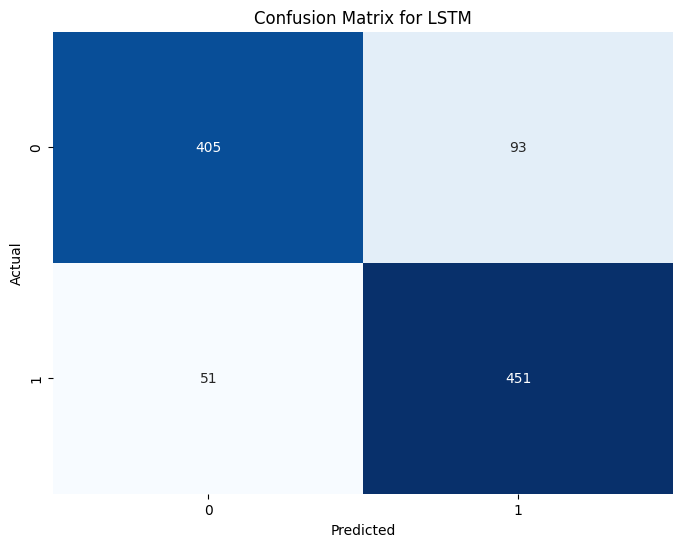

In [40]:
# Detailed report of the best model
best_model_name = best_model
best_model = results[best_model]['model']

# Predicting using the best model
if best_model_name in models:  # If it's a traditional ML model
    y_pred = best_model.predict(X_test_tfidf)
else:  # If it's a neural network model
    y_pred = (best_model.predict(X_test_pad) > 0.5).astype("int32")

# Print the classification report
print("\nClassification Report for the Best Model:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
!pip install transformers torch

In [42]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [44]:
# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [48]:
# Convert y_train and y_test to numpy arrays to avoid indexing issues
train_labels = torch.tensor(y_train.values)
test_labels = torch.tensor(y_test.values)

In [49]:
def prepare_data_for_bert(texts, labels, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    # Convert labels to tensor
    labels = torch.tensor(labels.values)  # Ensure it's a tensor of values, not a Pandas Series

    return input_ids, attention_masks, labels

In [50]:
# Prepare train and test data
train_inputs, train_masks, train_labels = prepare_data_for_bert(X_train, y_train, tokenizer)
test_inputs, test_masks, test_labels = prepare_data_for_bert(X_test, y_test, tokenizer)

In [51]:
# Create DataLoaders
batch_size = 32
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [52]:
from transformers import AdamW, get_linear_schedule_with_warmup

# Set up optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 10
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}

        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    print(f"Epoch {epoch+1}/{epochs} - Average loss: {total_loss/len(train_dataloader)}")

print("Training complete!")

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10 - Average loss: 0.3862630656828134
Epoch 2/10 - Average loss: 0.23083720675196512
Epoch 3/10 - Average loss: 0.1392022141927895
Epoch 4/10 - Average loss: 0.0883581482138806
Epoch 5/10 - Average loss: 0.055508864637741004
Epoch 6/10 - Average loss: 0.03583499863624763
Epoch 7/10 - Average loss: 0.02849143805553595
Epoch 8/10 - Average loss: 0.021924612285478557
Epoch 9/10 - Average loss: 0.011477710302962294
Epoch 10/10 - Average loss: 0.007544078551174793
Training complete!


BERT Model Accuracy: 0.904

Classification Report for BERT Model:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       498
           1       0.90      0.91      0.90       502

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



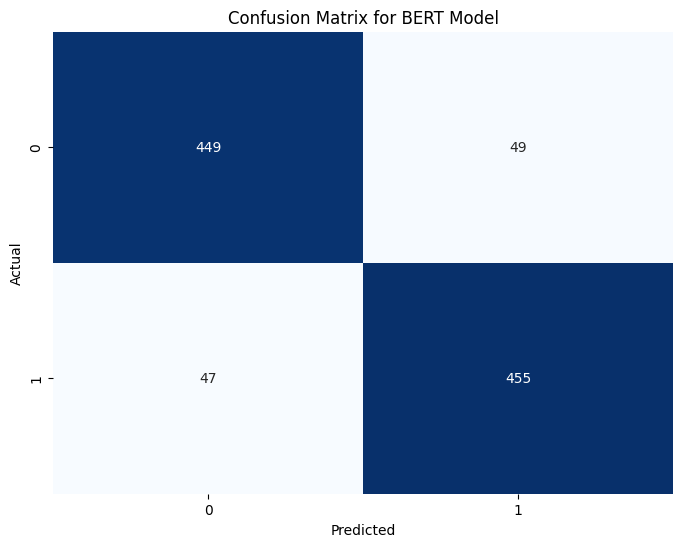

In [53]:
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1]}

        outputs = model(**inputs)
        logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
        true_labels.extend(batch[2].cpu().numpy())

bert_accuracy = accuracy_score(true_labels, predictions)
print(f"BERT Model Accuracy: {bert_accuracy}")
print("\nClassification Report for BERT Model:")
print(classification_report(true_labels, predictions))

# Confusion Matrix for BERT
cm_bert = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for BERT Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
print(f"Best Previous Model: {best_model_name}")
print(f"Best Previous Model Accuracy: {results[best_model_name]['accuracy']}")
print(f"BERT Model Accuracy: {bert_accuracy}")

# Determine the overall best model
if bert_accuracy > results[best_model_name]['accuracy']:
    print("BERT outperformed the previous best model.")
else:
    print(f"{best_model_name} remains the best performing model.")

Best Previous Model: LSTM
Best Previous Model Accuracy: 0.8560000061988831
BERT Model Accuracy: 0.904
BERT outperformed the previous best model.
